In [1]:
#Notebook do prezentacji

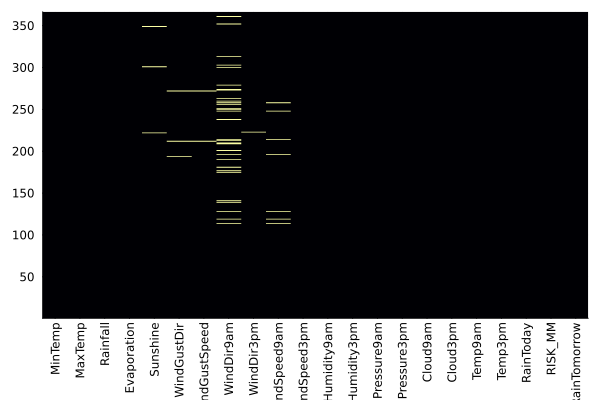

In [3]:
using DataFrames
using CSV
using StatsPlots

weather_data = DataFrame(CSV.File("weather.csv", normalizenames=true, delim=",", missingstring="NA"))
# print(describe(weather_data))

# heatmap(Matrix(ismissing.(weather_data)), xlabel=(names(weather_data), :vertical))
missingvals = ismissing.(weather_data)
@df missingvals heatmap(cols(),xrotation=90,xticks=(1:length(names(missingvals)),names(missingvals)),colorbar=false,)

/Users/tomasz/.julia/conda/3/aarch64/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tomasz/.julia/conda/3/aarch64/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tomasz/.julia/conda/3/aarch64/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


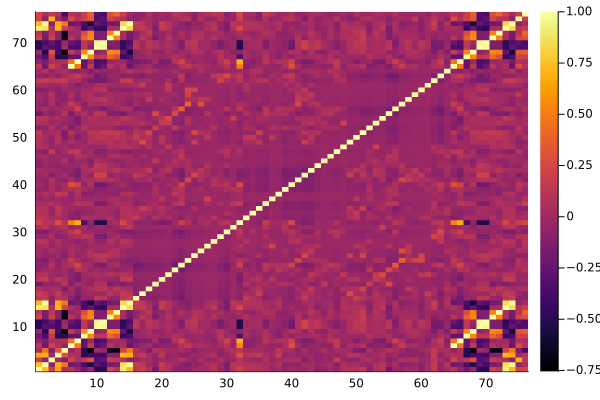

In [19]:
using Statistics
using Impute: Impute
using Random
using Distances
using ScikitLearn
@sk_import preprocessing: (LabelBinarizer, StandardScaler, OneHotEncoder)

Impute.srs!(weather_data; rng=MersenneTwister(1234))

mapper2 = DataFrameMapper([([:MinTemp], StandardScaler()),
([:MaxTemp], StandardScaler()),
([:Rainfall], StandardScaler()),
([:Evaporation], StandardScaler()),
([:Sunshine], StandardScaler()),
([:WindSpeed9am], StandardScaler()),
([:WindSpeed3pm], StandardScaler()),
([:Humidity9am], StandardScaler()),
([:Humidity3pm], StandardScaler()),
([:Pressure9am], StandardScaler()),
([:Pressure3pm], StandardScaler()),
([:Cloud9am], StandardScaler()),
([:Cloud3pm], StandardScaler()),
([:Temp9am], StandardScaler()),
([:Temp3pm], StandardScaler()),
([:WindGustDir], OneHotEncoder(sparse=false)),
([:WindGustSpeed], StandardScaler()),
([:WindDir9am], OneHotEncoder(sparse=false)),
([:WindDir3pm], OneHotEncoder(sparse=false)),
([:WindSpeed9am], StandardScaler()),
([:WindSpeed3pm], StandardScaler()),
([:Humidity9am], StandardScaler()),
([:Humidity3pm], StandardScaler()),
([:Pressure9am], StandardScaler()),
([:Pressure3pm], StandardScaler()),
([:Cloud9am], StandardScaler()),
([:Cloud3pm], StandardScaler()),
([:Temp9am], StandardScaler()),
([:Temp3pm], StandardScaler()),
(:RainToday, LabelBinarizer()),
(:RainTomorrow, LabelBinarizer())]
)

data_matrix = fit_transform!(mapper2, copy(weather_data))



cm = pairwise(cor, eachcol(data_matrix))
heatmap(cm)